# Handling Null Values

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Numerical Data (continuous)
### Dataset Creation

In [12]:
np.random.seed(0)
data_numeric = pd.DataFrame({
    'A': np.random.normal(loc=0, scale=1, size=100),
    'B': np.random.normal(loc=10, scale=2, size=100)
})
data_numeric.loc[10:20, 'A'] = np.nan  # Introduce null values in column 'A'
data_numeric.head(20)

,A,B
0,1.764052,13.766301
1,0.400157,7.304482
2,0.978738,7.459030
3,2.240893,11.938793
4,1.867558,7.653753
5,-0.977278,13.887242
6,0.950088,9.172762
7,-0.151357,8.505090
8,-0.103219,13.845884
9,0.410599,12.961030


### Identifying Null Values
Identifying null values is the first step. In Python, the pandas library is commonly used.

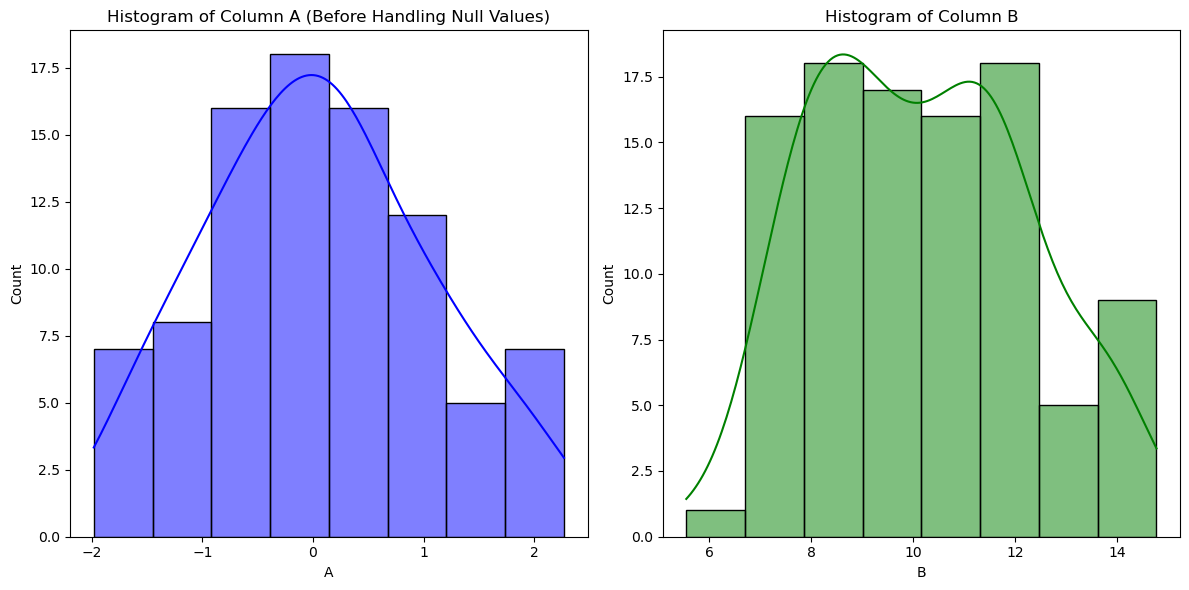

In [10]:
#Visualize data distribution before handling null values
plt.figure(figsize=(12, 6))
#Histograms before handling null values
plt.subplot(1, 2, 1)
sns.histplot(data_numeric['A'], kde=True, color='blue')
plt.title('Histogram of Column A (Before Handling Null Values)')

plt.subplot(1, 2, 2)
sns.histplot(data_numeric['B'], kde=True, color='green')
plt.title('Histogram of Column B')

plt.tight_layout()
plt.show()

### Removing Null Values
Remove Rows/Columns: This method is straightforward but can lead to a loss of data, which might not be ideal for small datasets.

In [108]:
data_cleaned = data_numeric.copy()
data_cleaned = data_cleaned.dropna(subset=['A'])
data_cleaned.isnull().sum()

A    0
B    0
dtype: int64

### Techniques for Numerical Data
### 1. Mean Imputation
Mean imputation replaces missing values with the mean of the non-missing values in the column. It assumes that the data is normally distributed and does not significantly alter the distribution of the data.

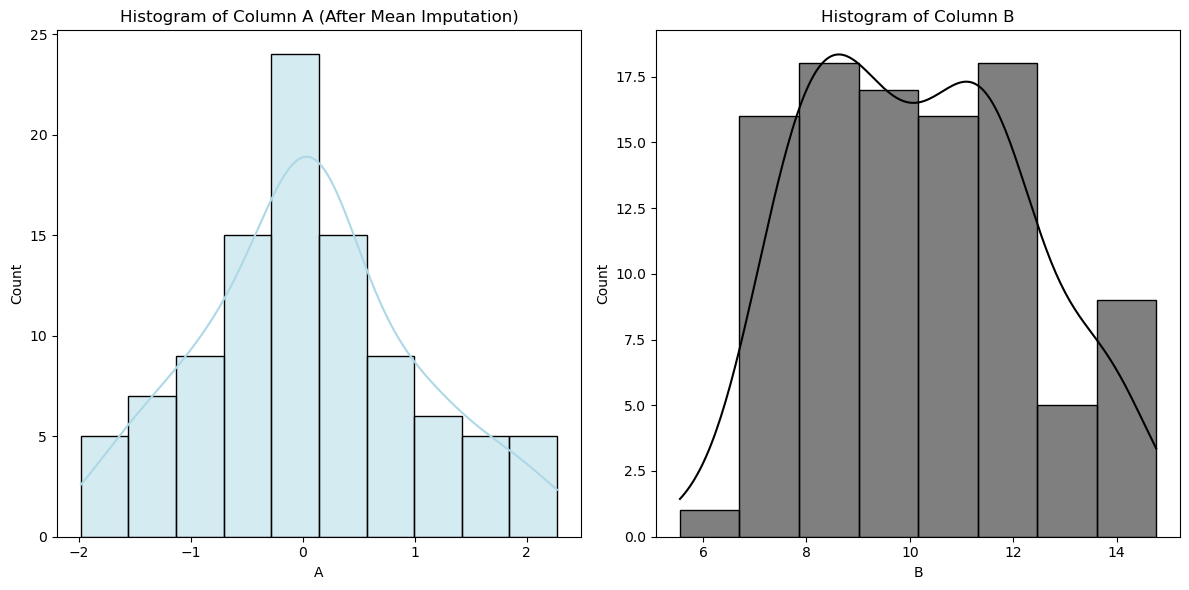

In [59]:
data_numeric_mean = data_numeric.copy()
data_numeric_mean['A'].fillna(data_numeric_mean['A'].mean(), inplace=True)

# Visualize data distribution after mean imputation
plt.figure(figsize=(12, 6))

# Histograms after mean imputation
plt.subplot(1, 2, 1)
sns.histplot(data_numeric_mean['A'], kde=True, color='lightblue')
plt.title('Histogram of Column A (After Mean Imputation)')

plt.subplot(1, 2, 2)
sns.histplot(data_numeric_mean['B'], kde=True, color='black')
plt.title('Histogram of Column B')

plt.tight_layout()
plt.show()


**Justification for Mean Imputation:**
1. Applicability: Suitable when missing data is missing completely at random (MCAR) or missing at random (MAR).
2. Impact: Preserves the mean of the data, maintaining the overall distribution.
3. Considerations: May distort relationships if missing data is not MCAR or MAR.

### 2. Median Imputation
Median imputation replaces missing values with the median of the non-missing values in the column. It is robust to outliers and skewed data distributions.

In [24]:
data_numeric_median = data_numeric.copy()
data_numeric_median['A'].fillna(data_numeric_median['A'].median(), inplace=True)
data_numeric_median.isnull().sum()

A    0
B    0
dtype: int64

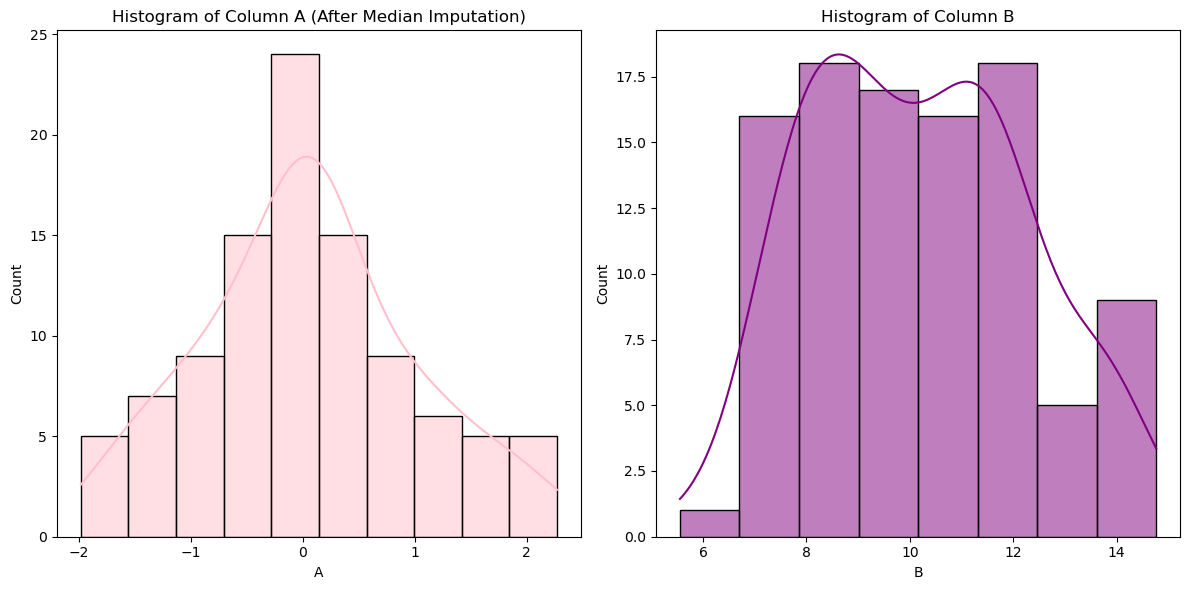

In [57]:
# Visualize data distribution after median imputation
plt.figure(figsize=(12, 6))

# Histograms after median imputation
plt.subplot(1, 2, 1)
sns.histplot(data_numeric_median['A'], kde=True, color='pink')
plt.title('Histogram of Column A (After Median Imputation)')

plt.subplot(1, 2, 2)
sns.histplot(data_numeric_median['B'], kde=True, color='purple')
plt.title('Histogram of Column B')

plt.tight_layout()
plt.show()

**Justification for Median Imputation:**
1. Applicability: Suitable when data is skewed or contains outliers.
2. Impact: Preserves the median and is robust to extreme values.
3. Considerations: May not be appropriate for normally distributed data.

### 3. Forward Fill (ffill) and Backward Fill (bfill)
Forward fill (ffill) and backward fill (bfill) propagate the last valid observation forward or backward to fill missing values. They are suitable for time series data where missing values occur in sequences

In [21]:
data_numeric_ffill = data_numeric.copy()
data_numeric_ffill['A'].fillna(method='ffill', inplace=True)
data_numeric_bfill = data_numeric.copy()
data_numeric_bfill['A'].fillna(method='bfill', inplace=True)

data_numeric_ffill.isnull().sum()

A    0
B    0
dtype: int64

In [20]:
data_numeric_bfill.isnull().sum()

A    0
B    0
dtype: int64

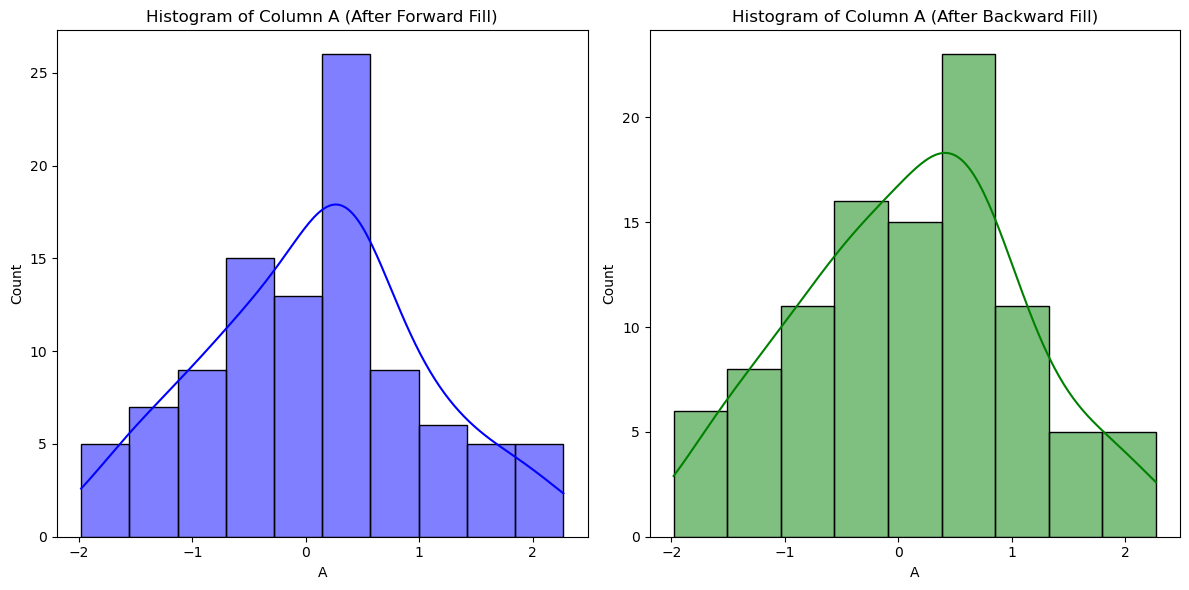

In [16]:
# Visualize data distribution after ffill and bfill
plt.figure(figsize=(12, 6))

# Histograms after ffill and bfill
plt.subplot(1, 2, 1)
sns.histplot(data_numeric_ffill['A'], kde=True, color='blue')
plt.title('Histogram of Column A (After Forward Fill)')

plt.subplot(1, 2, 2)
sns.histplot(data_numeric_bfill['A'], kde=True, color='green')
plt.title('Histogram of Column A (After Backward Fill)')

plt.tight_layout()
plt.show()

**Justification for ffill and bfill:**
1. Applicability: Suitable for time series data or sequential data where missing values are expected to follow previous or subsequent values.
2. Impact: Preserves the trend and pattern of data over time.
3. Considerations: May not be suitable for data where the order does not imply a meaningful relationship.

### 4. Interpolation
Interpolation replaces missing values with estimated values based on neighboring data points. It assumes a smooth transition between existing data points, making it suitable for time-series or continuous data

**Steps for Interpolation**
- Identify Missing Values: Identify and locate missing values in the dataset.
- Choose Interpolation Method: Select an appropriate interpolation method (e.g., linear, quadratic, cubic) based on the nature of the data and the desired level of smoothness.
- Implement Interpolation: Apply the chosen interpolation method using Python libraries like Pandas and NumPy.
- Visualize the Interpolated Data: Use visualizations such as line plots or 3D plots to compare the original and interpolated data.

**Visualizing with Line Plots**
Line plots are effective for visualizing the continuity and trend of data points before and after interpolation.

In [25]:
data_numeric_interpolate = data_numeric.copy()
data_numeric_interpolate['A'].interpolate(method='linear', inplace=True)

data_numeric_interpolate.isnull().sum()

A    0
B    0
dtype: int64

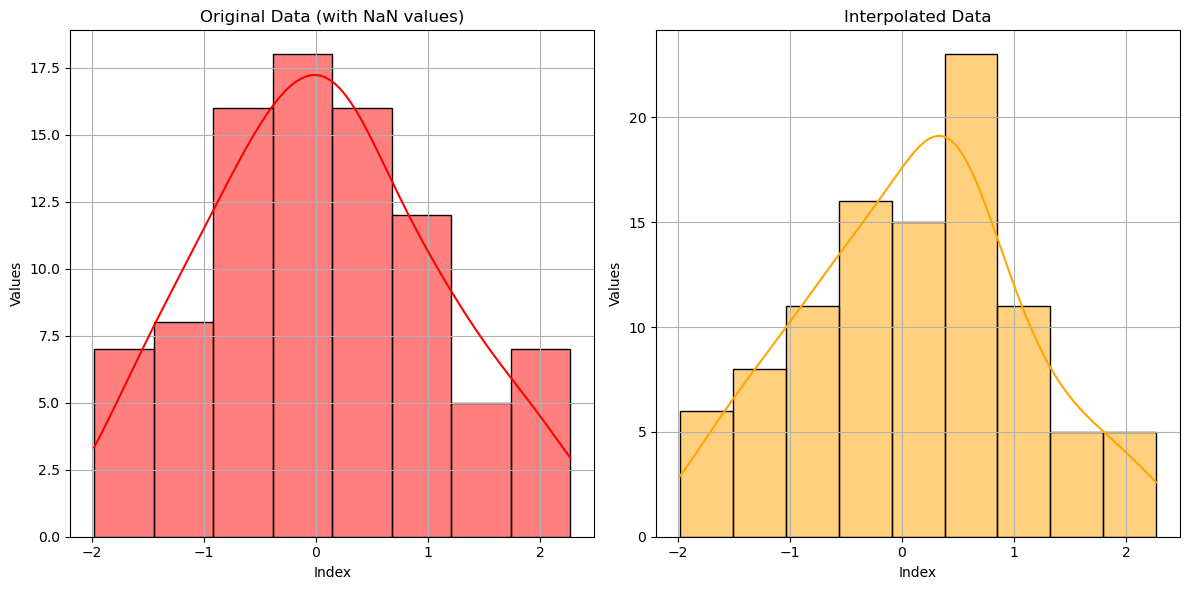

In [56]:
# Original data plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_numeric['A'], color='red', kde=True)
plt.title('Original Data (with NaN values)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)

# Interpolated data plot
plt.subplot(1, 2, 2)
sns.histplot(data_numeric_interpolate['A'], color='orange',kde=True)
plt.title('Interpolated Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)

plt.tight_layout()
plt.show()

### 5.End of Distribution
End of Distribution imputation replaces missing values with values at the tails (either minimum or maximum) of the distribution of non-missing values. This method is particularly effective for handling outliers, ensuring that imputed values do not significantly affect the distribution's central tendency.
**Steps for End of Distribution Imputation**
- Identify Missing Values: First, identify which values are missing in your dataset.
- Calculate Quantiles: Compute the quantiles (e.g., 25th and 75th percentiles) of the non-missing values.
- Determine Replacement Value: Replace missing values with a value from the lower or upper quantile (depending on whether you choose the minimum or maximum end).
- Implementation: Apply this replacement strategy using statistical libraries like pandas.

**Visualizing with Box Plots:**
Box plots are effective visualizations for understanding the distribution of a dataset, especially when demonstrating quantiles and outliers.

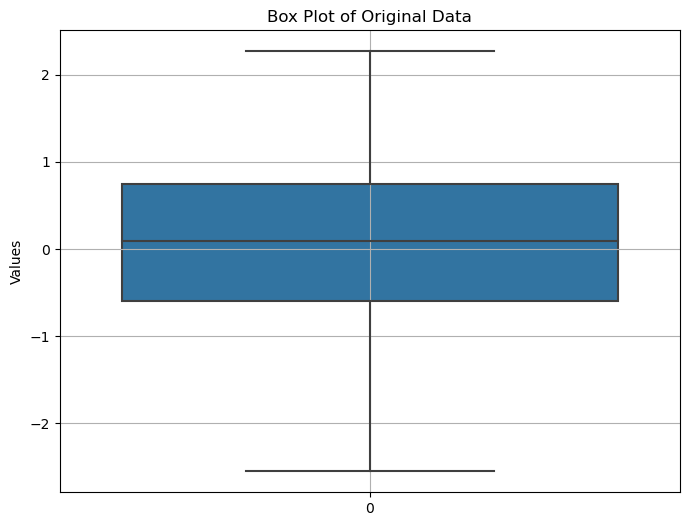

In [34]:
data_numeric_copy = data_numeric.copy()
# Create a box plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, orient='v')
plt.title('Box Plot of Original Data')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Calculate quantiles for replacement
q1 = np.nanpercentile(data, 25)
q3 = np.nanpercentile(data, 75)

# End of Distribution imputation
data_imputed = data_numeric_copy.copy()
data_imputed[np.isnan(data_imputed)] = q1  # Replace NaNs with 25th percentile (lower end)

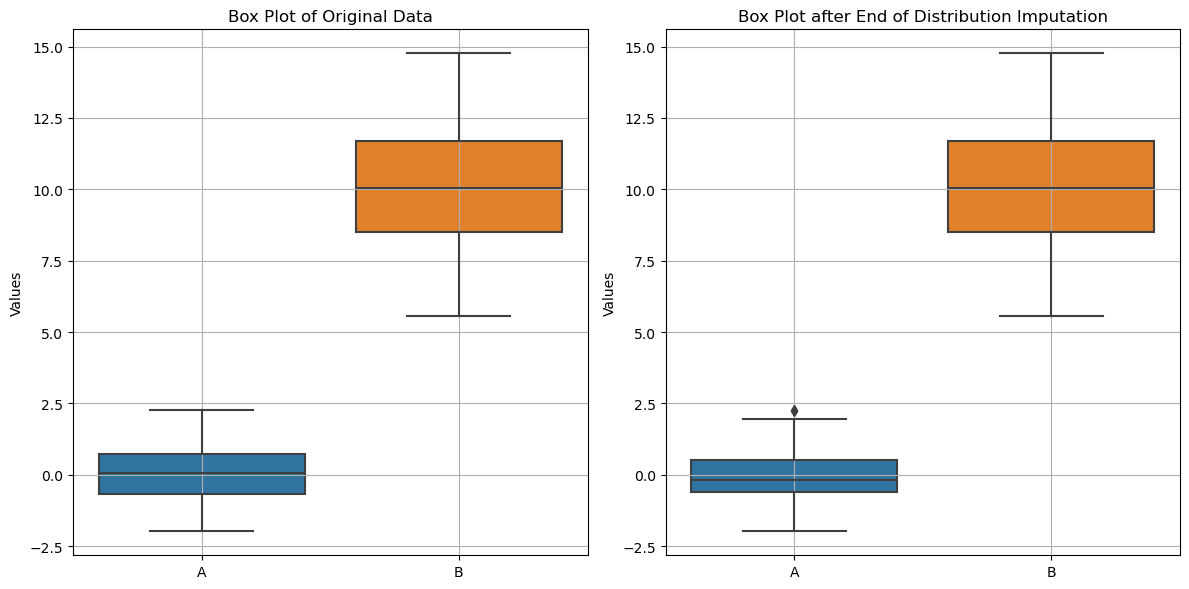

In [35]:
# Visualize original vs. imputed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data_numeric_copy, orient='v')
plt.title('Box Plot of Original Data')
plt.ylabel('Values')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(data=data_imputed, orient='v')
plt.title('Box Plot after End of Distribution Imputation')
plt.ylabel('Values')
plt.grid(True)

plt.tight_layout()
plt.show()

**Box Plot of Original Data:** Shows the distribution of the original data, highlighting any outliers and the interquartile range (IQR).

**End of Distribution Imputation:** Replaces missing values with the 25th percentile value (upper end) in this example. The box plot after imputation illustrates how the distribution changes.

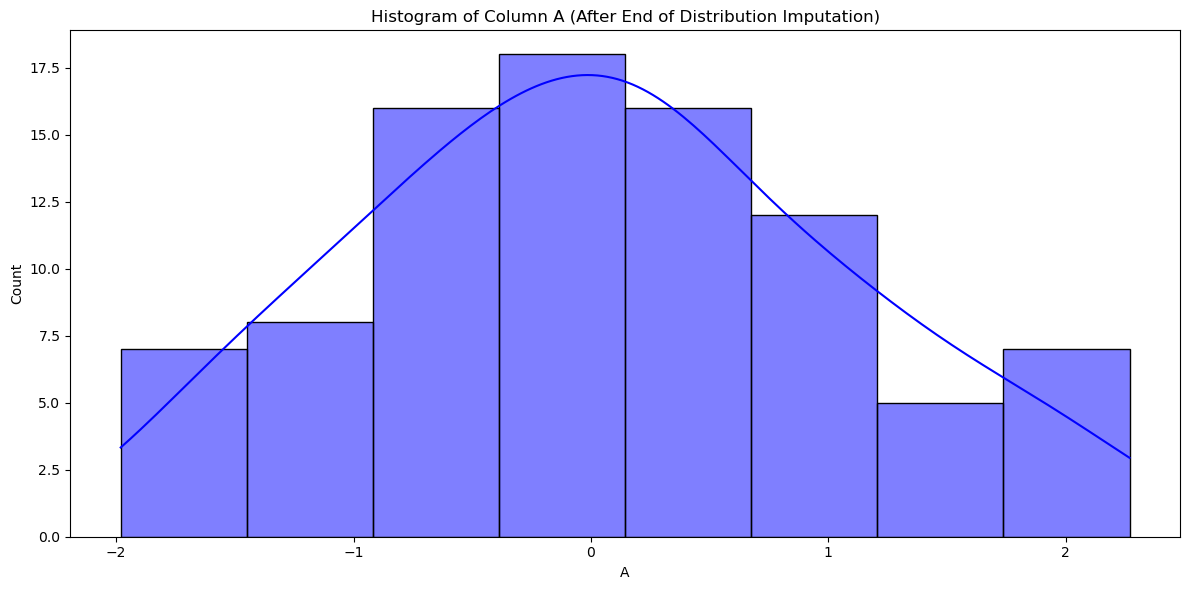

In [36]:
plt.figure(figsize=(12, 6))
# Histogram after end of distribution imputation
sns.histplot(data_numeric_copy['A'], kde=True, color='blue')
plt.title('Histogram of Column A (After End of Distribution Imputation)')
plt.tight_layout()
plt.show()

### 6. K-Nearest Neighbors (KNN) Imputation
KNN imputation replaces missing values by using the values of neighboring instances. It computes the distance between instances based on the available features and imputes the missing values with the average (for numerical data) or mode (for categorical data) of the nearest neighbors' values.

**Steps for KNN Imputation**
- Identify Missing Values: Identify which values are missing in your dataset.
- Select Features: Choose relevant features (columns) to use for imputation. These should be numeric and relevant to the data context.
- Calculate Distances: Compute distances between instances based on selected features. Common distance metrics include Euclidean distance or Manhattan distance.
-Find Nearest Neighbors: Select the nearest neighbors based on the calculated distances. The number of neighbors (k) is a hyperparameter that needs to be determined based on the dataset and context.
- Impute Missing Values: Replace missing values with the average (for numerical data) or mode (for categorical data) of the selected nearest neighbors' values.

In [43]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)
data_numeric_imputed.isnull().sum()

A    0
B    0
dtype: int64

**Visualizing with Scatter Plots**
Scatter plots can visually represent the relationship between variables and how KNN imputation affects the distribution of data.

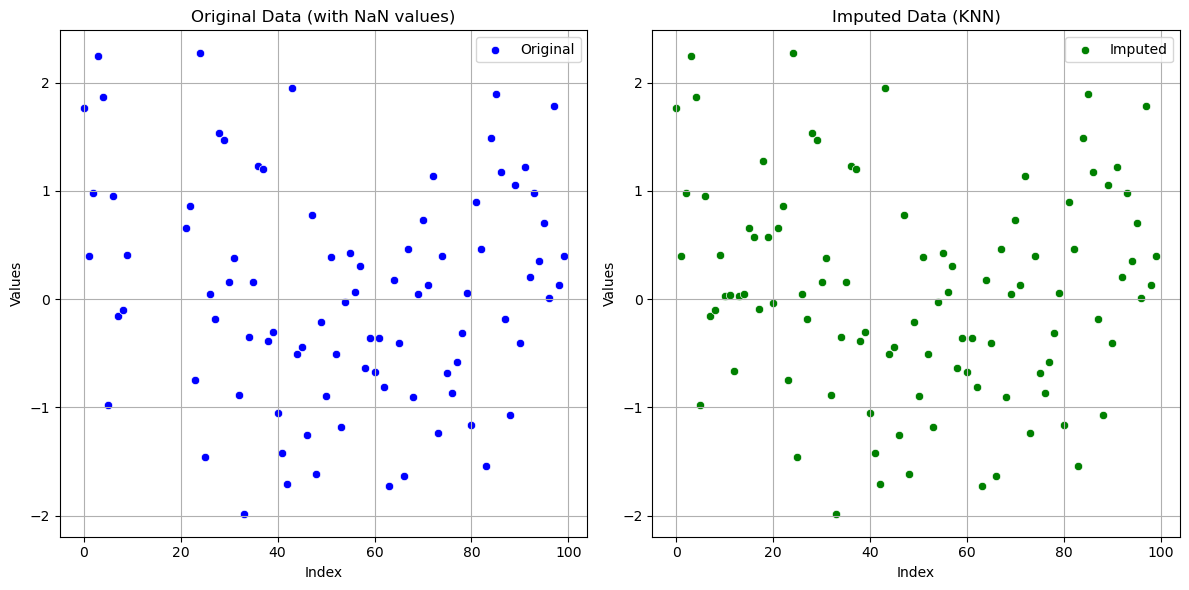

In [44]:
# Plotting original and imputed data
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_numeric.index, y=data_numeric['A'], color='blue', label='Original')
plt.title('Original Data (with NaN values)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)

# Imputed data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_numeric_imputed.index, y=data_numeric_imputed['A'], color='green', label='Imputed')
plt.title('Imputed Data (KNN)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)

plt.tight_layout()
plt.show()

KNN imputation is suitable for numerical data where values are expected to have a certain degree of continuity or similarity with neighboring instances. 
By considering the values of nearest neighbors, KNN imputation helps in preserving the structure and relationships within the data, making it effective in scenarios where local patterns are significant.

### 7. Multiple Imputation by Chained Equations (MICE)
MICE is an iterative imputation method that imputes missing values multiple times using regression models. It operates under the assumption that data are Missing at Random (MAR), where the probability of missing data depends on observed variables but not on missing data itself.

**Steps for MICE Imputation**
- Identify Missing Values: Identify which values are missing in your dataset.
- Select Imputation Model: Choose a suitable regression model for each variable with missing values. Models can be linear regression, logistic regression, etc., depending on the nature of the variables.
- Iterative Imputation: Impute missing values iteratively using regression models for each variable with missing data. Each imputed value is based on the current state of imputation for other variables.
- Combine Imputations: Combine multiple imputed datasets to obtain a final imputed dataset. This step accounts for uncertainty in the imputation process.

In [60]:
from sklearn.experimental import enable_iterative_imputer  # Needed for iterative imputer
from sklearn.impute import IterativeImputer

In [61]:
# MICE Imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

**Visualizing MICE Imputation**
Visualizations can help demonstrate the effectiveness of MICE imputation in preserving the distribution and relationships within the data.

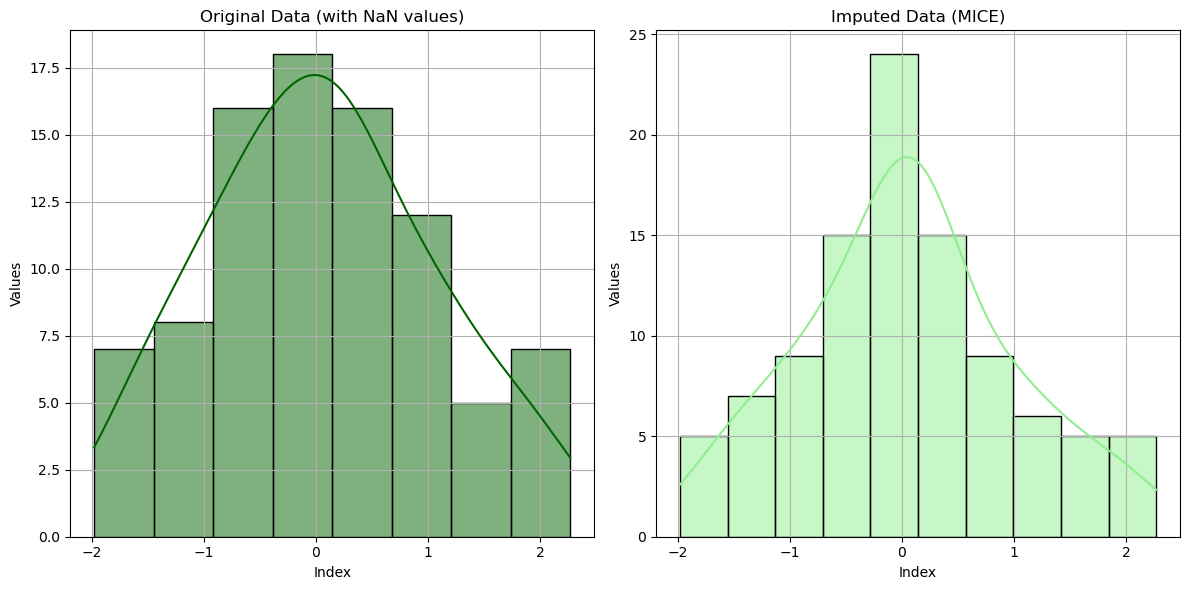

In [69]:
# Plotting original and imputed data
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(1, 2, 1)
sns.histplot(data_numeric['A'], color='darkgreen', kde=True)
plt.title('Original Data (with NaN values)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)

# Imputed data plot
plt.subplot(1, 2, 2)
sns.histplot(data_numeric_imputed['A'], color='lightgreen', kde=True)
plt.title('Imputed Data (MICE)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)

plt.tight_layout()
plt.show()

MICE is advantageous in scenarios where there are complex relationships between variables. By iteratively imputing missing values based on regression models, MICE preserves the statistical properties and relationships within the data, making it suitable for datasets with Missing at Random (MAR) patterns

## 2. Categorical Data
### Dataset Creation

In [84]:
data_categorical = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', None, 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Value': [10, 20, 15, 30, 25, 20, 5, 15, 10, 25, 20, 15, 30, 35, 40, 25, 20, 15, 10, 5]
})
data_categorical.head(20)

,Category,Value
0,A,10
1,B,20
2,C,15
3,A,30
4,B,25
5,C,20
6,A,5
7,B,15
8,C,10
9,A,25


### Frequency Distribution
Before handling missing values, visualize the frequency distribution of your categorical data using bar plots. This helps understand the distribution of existing values and the impact of missing values

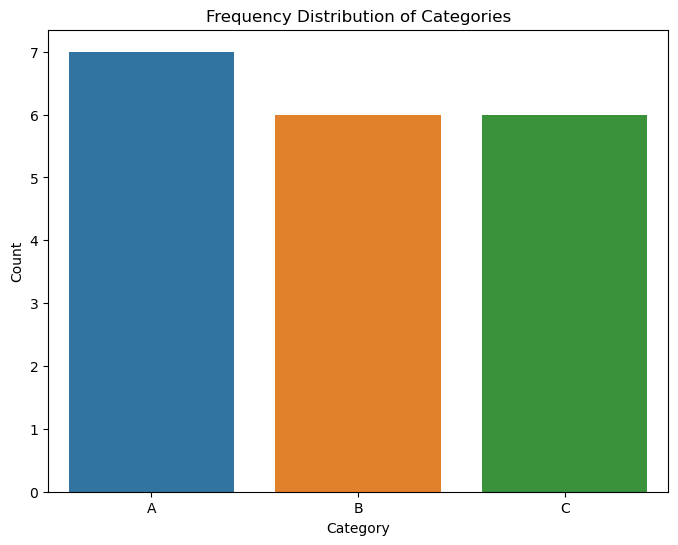

In [85]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=data_categorical)
plt.title('Frequency Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### Techniques for Categorical Data
### 1. Mode Imputation
Replace missing values with the mode (most frequent value) of the categorical variable.

In [86]:
data_categorical_copy=data_categorical.copy()
mode_value = data_categorical['Category'].mode()[0]
data_categorical_copy['Category'] = data_categorical['Category'].fillna(mode_value)

In [87]:
data_categorical_copy.head(20)

,Category,Value
0,A,10
1,B,20
2,C,15
3,A,30
4,B,25
5,C,20
6,A,5
7,B,15
8,C,10
9,A,25


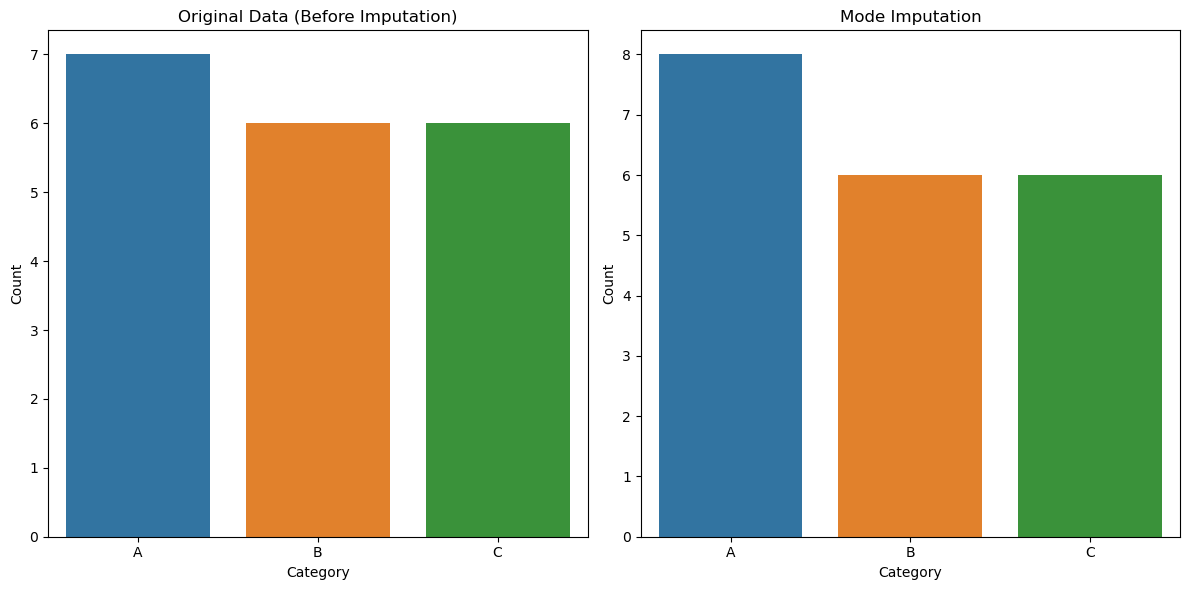

In [88]:
# Visualize original vs. imputed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=data_categorical['Category'], data=data_categorical)
plt.title('Original Data (Before Imputation)')
plt.xlabel('Category')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=data_categorical_copy['Category'], data=data_categorical_copy)
plt.title('Mode Imputation')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Justification**
Mode imputation is justified in scenarios where:
- Missing values are random and not systematically related to other variables.
- The mode is a valid representative of the majority or central tendency of the categorical variable.

By applying mode imputation and visualizing the results, we can effectively handle missing categorical data while preserving the dataset's overall distribution characteristics.

### 2. Creating a New Category
Creating a new category involves introducing a specific label (e.g., 'Unknown', 'Other') to explicitly represent missing values in a categorical variable.

In [91]:
# Creating a new category
data_categorical['Category_New_Category'] = data_categorical['Category'].fillna('Unknown')
data_categorical.head(20)

,Category,Value,Category_New_Category
0,A,10,A
1,B,20,B
2,C,15,C
3,A,30,A
4,B,25,B
5,C,20,C
6,A,5,A
7,B,15,B
8,C,10,C
9,A,25,A


**Visualsation**

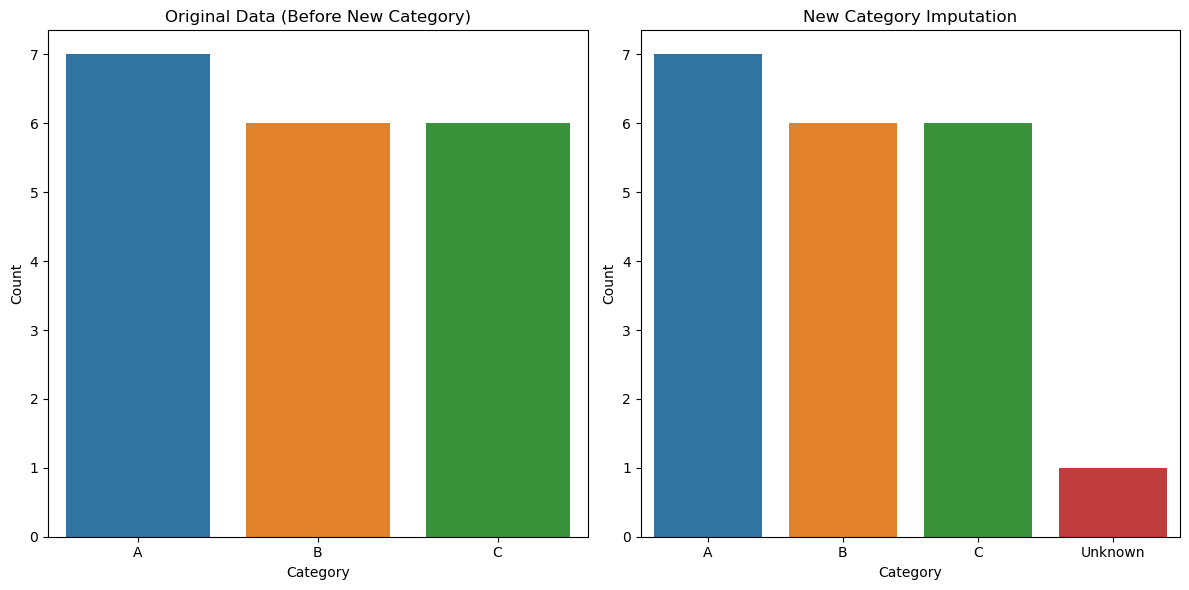

In [90]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Category', data=data_categorical)
plt.title('Original Data (Before New Category)')
plt.xlabel('Category')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Category_New_Category', data=data_categorical)
plt.title('New Category Imputation')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Justification**
Creating a new category is justified when:
- Explicitly representing missing values is important for analysis or downstream processes.
- Preserving the distinction between observed and missing data is necessary.

This method ensures missing categorical values are clearly identified and handled in a standardized manner.

### 3. Using Predictive Models (e.g., Decision Trees)
Using predictive models like decision trees leverages machine learning to predict missing categorical values based on other variables in the dataset. This method is useful when relationships exist between variables and can provide accurate imputations.

**Steps for Using Predictive Models**
- Prepare Data: Separate the dataset into training data with complete observations (non-null) and test data containing missing values to be predicted.
- Fit Decision Tree: Train a decision tree classifier using the training data to learn patterns and relationships between variables.
- Predict Missing Values: Apply the trained model to predict missing categorical values in the test data.

In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
data_categorical_pred = data_categorical.copy()

In [101]:
label_encoder = LabelEncoder()
data_categorical['Category_Encoded'] = label_encoder.fit_transform(data_categorical['Category'].astype(str))

# Separate data into training and test sets
train_data = data_categorical.dropna().copy()
test_data = data_categorical[data_categorical['Category'].isnull()].copy()

# Prepare training data
X_train = train_data[['Value']]
y_train = train_data['Category_Encoded']

# Fit decision tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict missing values
missing_indices = test_data.index
test_data['Category_DT_Imputed'] = label_encoder.inverse_transform(dt_classifier.predict(test_data[['Value']]))

# Merge imputed values back into original dataframe
data_categorical.loc[missing_indices, 'Category_DT_Imputed'] = test_data['Category_DT_Imputed']
# Prepare data for visualization
data_categorical_pred = data_categorical.copy()
data_categorical_pred['Imputation_Type'] = 'Original'
data_categorical_pred.loc[missing_indices, 'Imputation_Type'] = 'Decision Tree Imputation'


**Visyualisation of Decision tree**

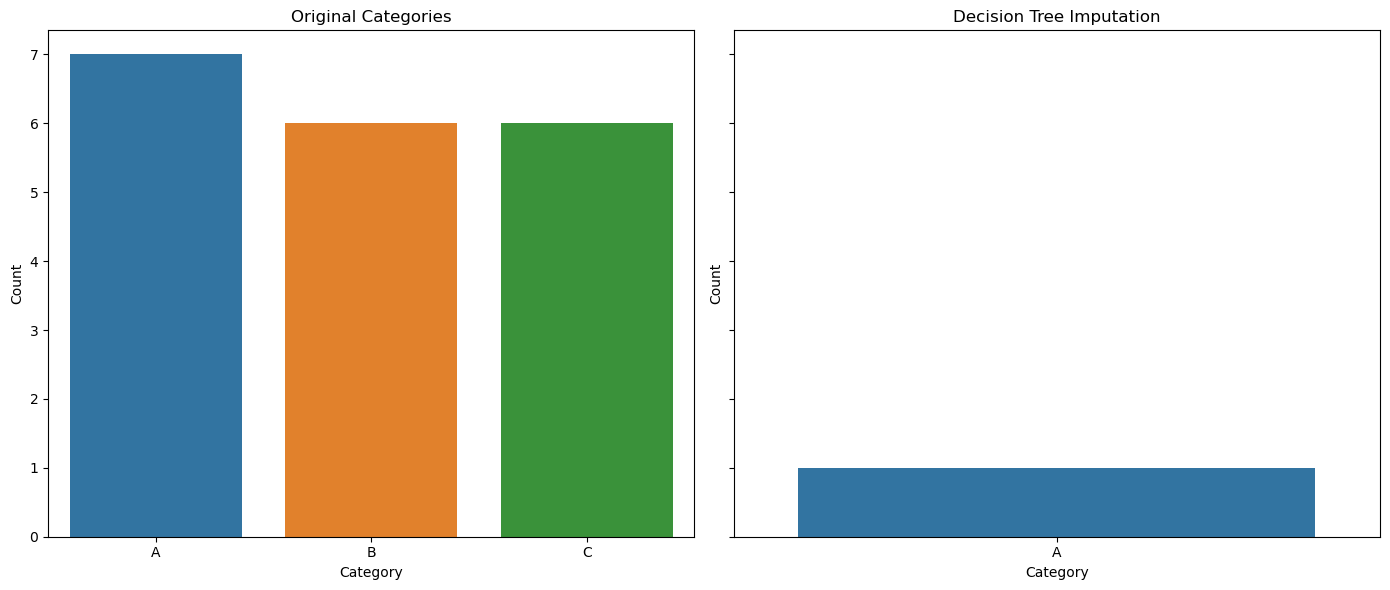

In [103]:
# Plotting the results in separate plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for original data
sns.countplot(x='Category', data=data_categorical_pred[data_categorical_pred['Imputation_Type'] == 'Original'], ax=axes[0])
axes[0].set_title('Original Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Plot for decision tree imputed data
sns.countplot(x='Category_DT_Imputed', data=data_categorical_pred[data_categorical_pred['Imputation_Type'] == 'Decision Tree Imputation'], ax=axes[1])
axes[1].set_title('Decision Tree Imputation')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Explanation and Justification**
- Label Encoding: Transforms categorical labels into integers ('A' -> 0, 'B' -> 1, 'C' -> 2, etc.), allowing the decision tree classifier to process the data.
- Decision Tree Imputation: Trains a decision tree using the numeric 'Value' feature to predict missing categorical values ('Category'). The imputed values ('Category_DT_Imputed') replace the original missing values.